
   # Ecommerce B2B Dataset

# AIM

To perform EDA on the Ecommerce dataset and find insights that can be helpful to identify the customers that gives highest business and orders.
We will be using data science skills to draw insights that happen in real markets and what sectors company need to focus to increase revenues


# DATA INFORMATION

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
This dataset to begin with consists of transactional data and infers to customers from different countries who purchase from an online retail store based in the United Kingdom (UK) that sells gifts for all the occasions. The information is summarized below:

●	Company – UK-based and registered non-store online retail

●	Products for selling – Gifts for all occasions

●	Customers – Most are wholesalers (local or international)

●	The overall transaction period was one year

# ATTRIBUTES

●	InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
    
●	StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. Stock Code is 'D' indicates Discount
	
●	Description: Product (item) name. Nominal. 

●	Quantity: The quantities of each product (item) per transaction. Numeric. 

●	InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated

●	UnitPrice: Unit price. Numeric, Product price per unit in sterling. 

●	CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 

●	Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import sweetviz
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [2]:
df=pd.read_csv(r'A:\ecomerce\data.csv', encoding= 'unicode_escape')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [4]:
df.head(10).style.background_gradient(cmap='PuBu').hide_index()

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.550000,17850.000000,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.390000,17850.000000,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.750000,17850.000000,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.390000,17850.000000,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.390000,17850.000000,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-01-2010 08:26,7.650000,17850.000000,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-01-2010 08:26,4.250000,17850.000000,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.850000,17850.000000,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,12-01-2010 08:28,1.850000,17850.000000,United Kingdom
536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-01-2010 08:34,1.690000,13047.000000,United Kingdom


In [5]:
df.tail(15).style.background_gradient(cmap='YlOrRd').hide_index()

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
581587,22631,CIRCUS PARADE LUNCH BOX,12,12-09-2011 12:50,1.950000,12680.000000,France
581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,12-09-2011 12:50,1.650000,12680.000000,France
581587,22555,PLASTERS IN TIN STRONGMAN,12,12-09-2011 12:50,1.650000,12680.000000,France
581587,22728,ALARM CLOCK BAKELIKE PINK,4,12-09-2011 12:50,3.750000,12680.000000,France
581587,22727,ALARM CLOCK BAKELIKE RED,4,12-09-2011 12:50,3.750000,12680.000000,France
581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12-09-2011 12:50,3.750000,12680.000000,France
581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12-09-2011 12:50,3.750000,12680.000000,France
581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12-09-2011 12:50,1.950000,12680.000000,France
581587,22629,SPACEBOY LUNCH BOX,12,12-09-2011 12:50,1.950000,12680.000000,France
581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12-09-2011 12:50,4.150000,12680.000000,France


In [6]:
df.describe().T/df.shape[0]

,count,mean,std,min,25%,50%,75%,max
Quantity,1.000000,0.000018,0.000402,-0.149462,0.000002,0.000006,0.000018,0.149462
UnitPrice,1.000000,0.000009,0.000179,-0.020413,0.000002,0.000004,0.000008,0.071912
CustomerID,0.750733,0.028211,0.003162,0.022782,0.025748,0.027960,0.030985,0.033746


In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

df.shape

In [8]:
df.columns[df.isnull().any()]

Index(['Description', 'CustomerID'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


As we can see that the InvoiceDate is in string formate and we have to change it as DateTime formate

In [10]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [11]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Now it is converted into date time formate 

Now we can extract day,hour,month,year from InvoiceDate column


In [12]:
df['Month_Year']=pd.to_datetime(df['InvoiceDate']).dt.to_period('M')
df['Month_Year']=df.Month_Year.dt.strftime('%b-%y')

In [13]:
df['Hour']=df['InvoiceDate'].dt.hour

df['Day']=df['InvoiceDate'].dt.day
df['Day']=pd.to_datetime(df['Day'])
df['Day']=df.Day.dt.strftime('%A')


df['Month']=df['InvoiceDate'].dt.month
df['Month']=pd.to_datetime(df['Month'])
df['Month']=df.Month.dt.strftime('%B')


In [14]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,Hour,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Dec-10,8,Thursday,January
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec-10,8,Thursday,January
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Dec-10,8,Thursday,January
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec-10,8,Thursday,January
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec-10,8,Thursday,January


We see there are some missing values ['Description', 'CustomerID'] now we have to check is there any negavtive if there is negative value what does it mean 

In [15]:
df[df.Quantity<0]['Quantity']

141       -1
154       -1
235      -12
236      -24
237      -24
          ..
540449   -11
541541    -1
541715    -5
541716    -1
541717    -5
Name: Quantity, Length: 10624, dtype: int64

In [16]:
df[df.Quantity<0]['Quantity'].sum()

-484531

In [17]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month_Year', 'Hour', 'Day',
       'Month'],
      dtype='object')

In [18]:
df[df.UnitPrice<0]['UnitPrice']

299983   -11062.06
299984   -11062.06
Name: UnitPrice, dtype: float64

As mentioned above, if the invoice number starts with the letter "C", it means it the order was cancelled.

In [19]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,Hour,Day,Month
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Dec-10,9,Thursday,January
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Dec-10,9,Thursday,January
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Dec-10,10,Thursday,January
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Dec-10,10,Thursday,January
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Dec-10,10,Thursday,January


In [20]:
cancelled_orders.shape

(9288, 12)

Calculate the percentage of cancellations by dividing the cancelled orders by the total orders

In [21]:
print("There were", len(cancelled_orders), "cancelled orders.")
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9288 cancelled orders.
Percentage of orders cancelled: 35.86% 


In [22]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month_Year,Hour,Day,Month


Since nothing came back when we filtered the cancelled orders by Quantity > 0, this confirms that the negative values mean the order was cancelled.

created a new dataframe cancelled_order that filter the records having Invoice Number starting with "C". Here "C" represents the cancelled orders.

In [23]:
cancelled_orders_discounts=cancelled_orders[cancelled_orders['StockCode']=='D']


In [24]:
Missing_values=df.loc[:,['Description','CustomerID']]
Missing_values['DayMonthYear']=df.InvoiceDate.dt.strftime('%a-%b-%y')
Missing_values['Month']=df.InvoiceDate.dt.strftime('%b')
Missing_values['Year']=df.InvoiceDate.dt.strftime('%y')

In [25]:
Missing_values

,Description,CustomerID,DayMonthYear,Month,Year
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,Wed-Dec-10,Dec,10
1,WHITE METAL LANTERN,17850.0,Wed-Dec-10,Dec,10
2,CREAM CUPID HEARTS COAT HANGER,17850.0,Wed-Dec-10,Dec,10
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,Wed-Dec-10,Dec,10
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0,Wed-Dec-10,Dec,10
...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12680.0,Fri-Dec-11,Dec,11
541905,CHILDREN'S APRON DOLLY GIRL,12680.0,Fri-Dec-11,Dec,11
541906,CHILDRENS CUTLERY DOLLY GIRL,12680.0,Fri-Dec-11,Dec,11
541907,CHILDRENS CUTLERY CIRCUS PARADE,12680.0,Fri-Dec-11,Dec,11


(array([47392., 19928., 27177., 22644., 28322., 54012., 27013., 40030.,
        49557., 81849.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

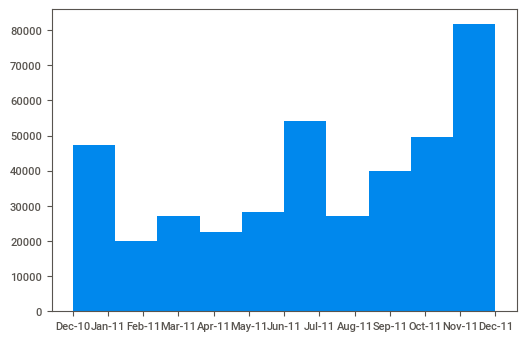

In [40]:
missing_group_1 = df.groupby('Month_Year')
plt.hist(df.Month_Year)



In [52]:
missing_group_2=Missing_values.groupby('DayMonthYear')


In [28]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Month_Year          0
Hour                0
Day                 0
Month               0
dtype: int64

In [29]:
df=df.dropna(axis = 0, how ='any')

In [30]:
df = df.drop(df[df['Quantity'] < 0].index)

In [31]:
df["Amount_Spent"] = df["Quantity"] * df["UnitPrice"]

In [32]:
df["CustomerID"] = df["CustomerID"].astype(np.int64)

In [33]:
df.shape

(397924, 13)

# Visualizing Data

                                             |                                             | [  0%]   00:00 ->…


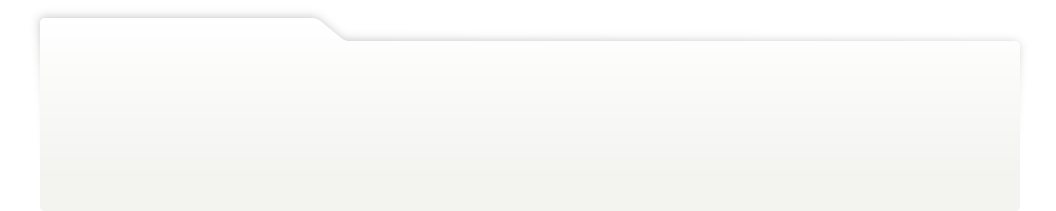
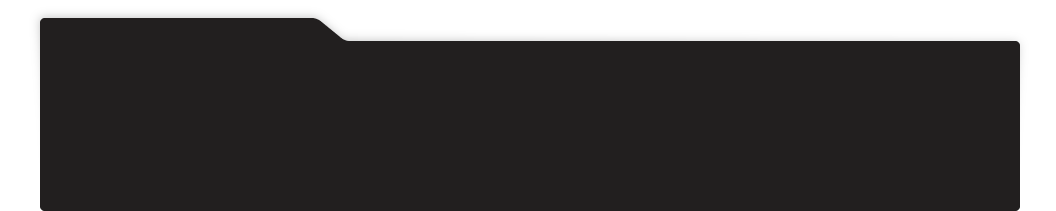
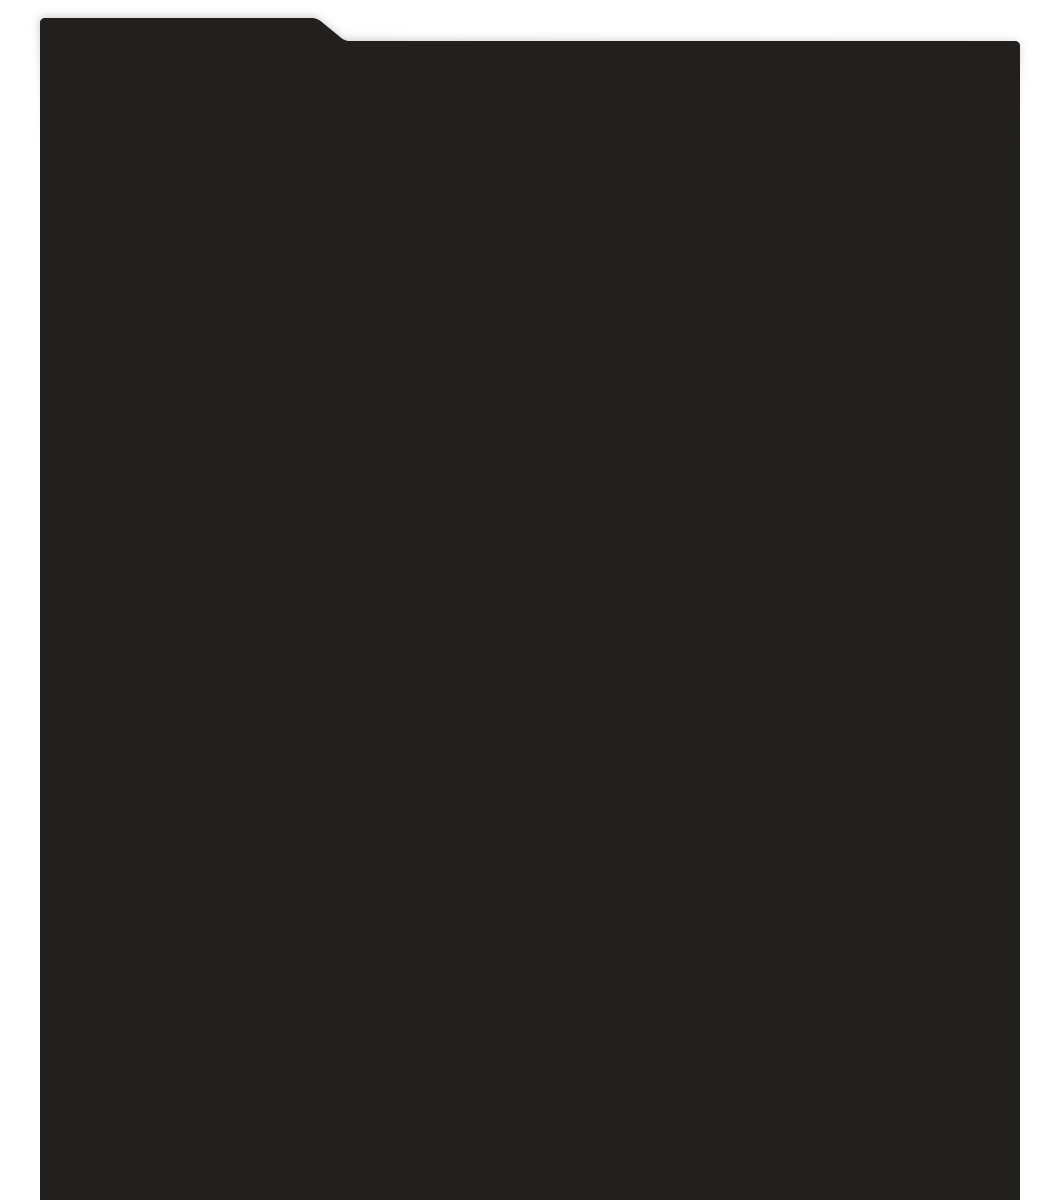
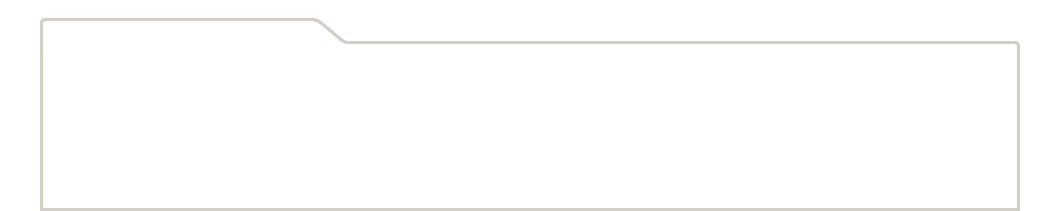
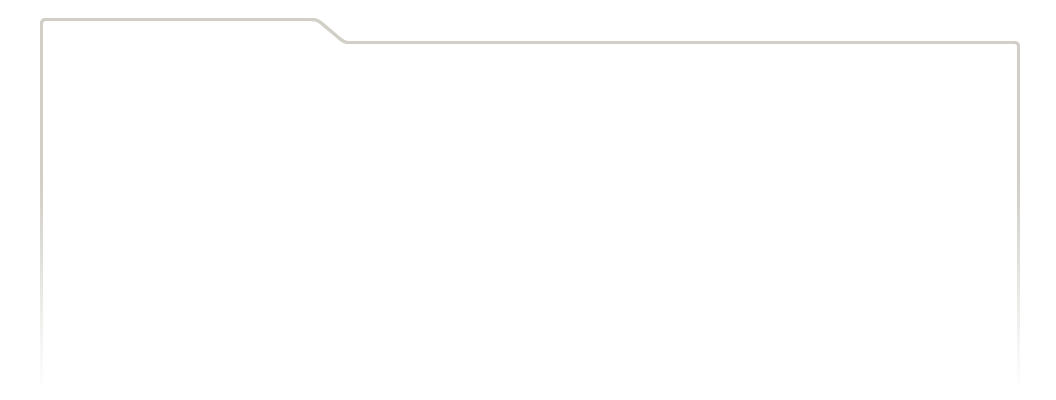
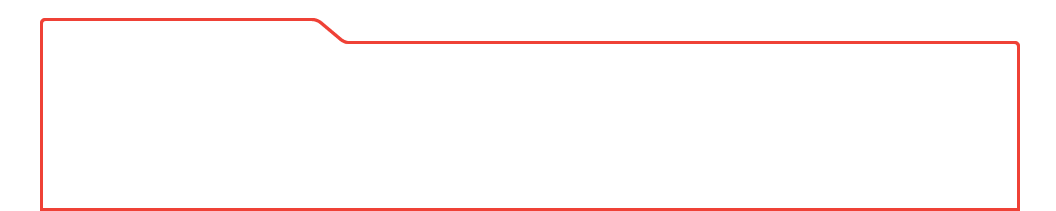
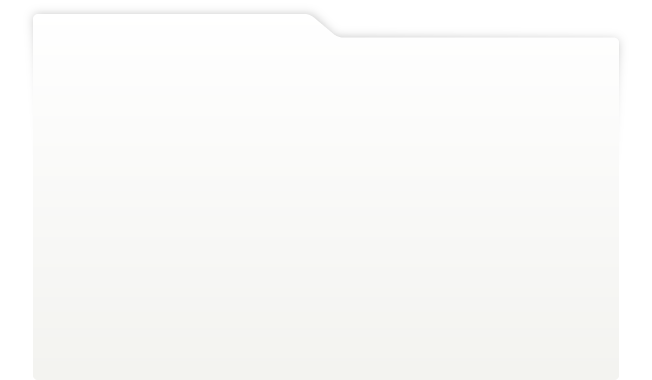
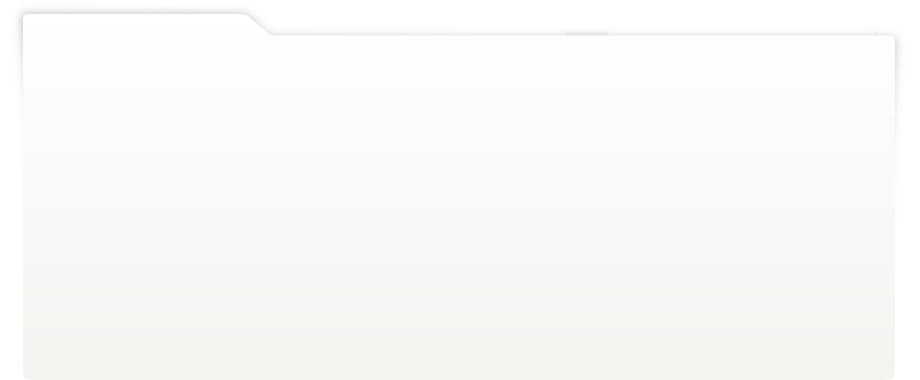
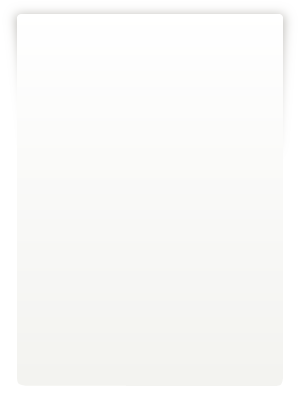
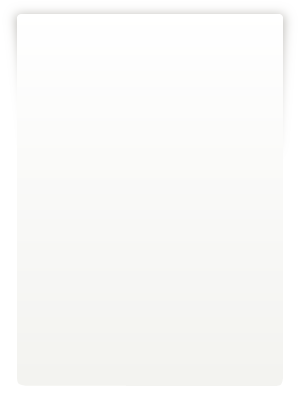
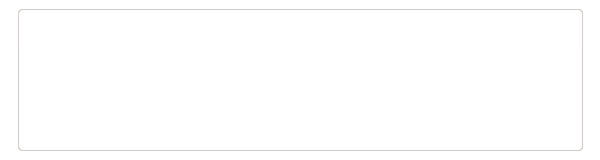
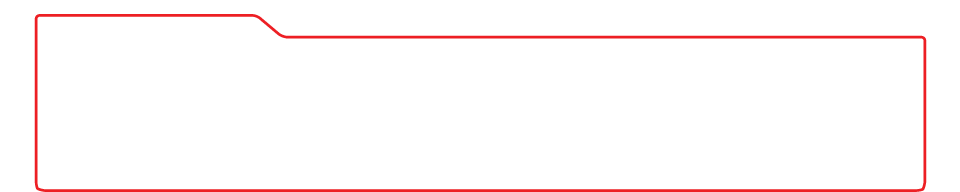
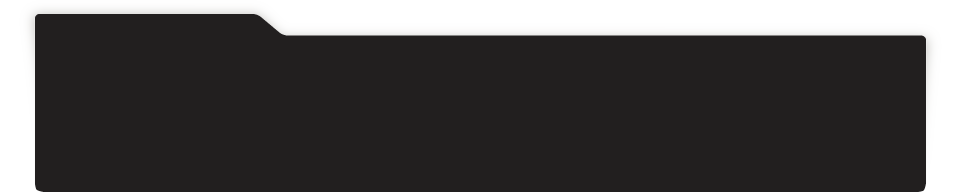
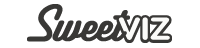
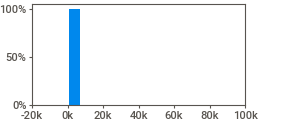
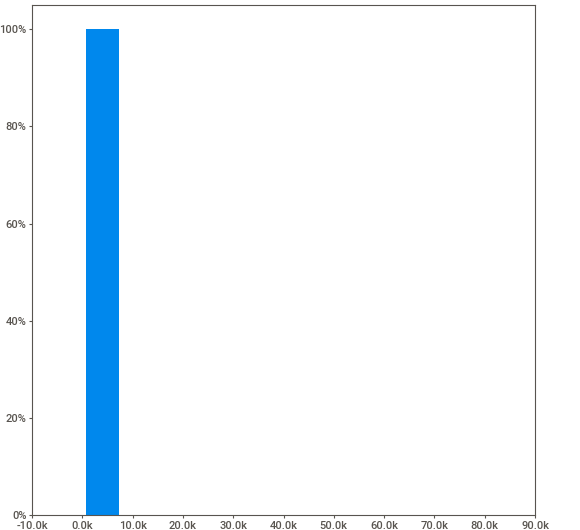
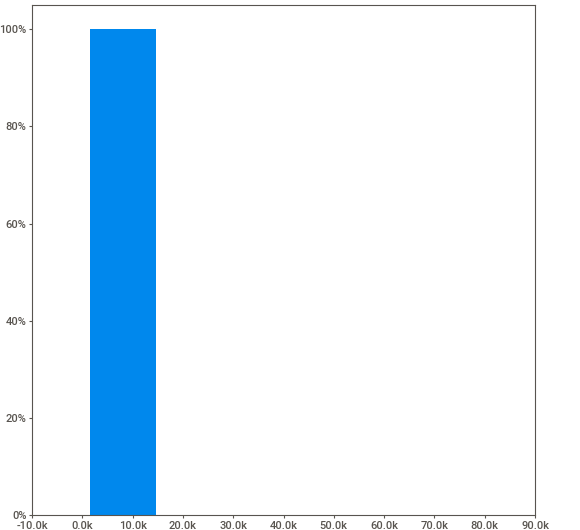
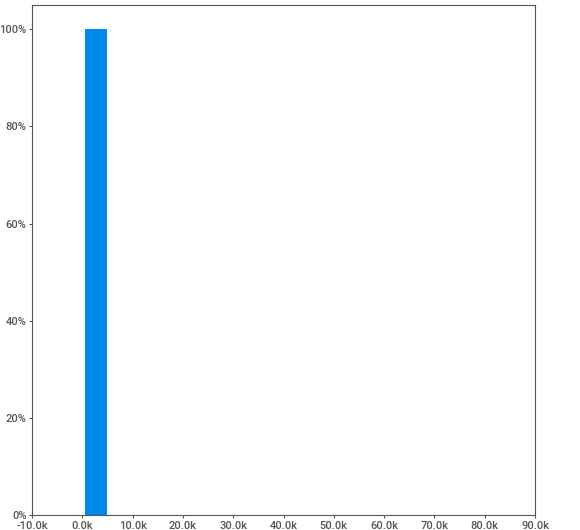
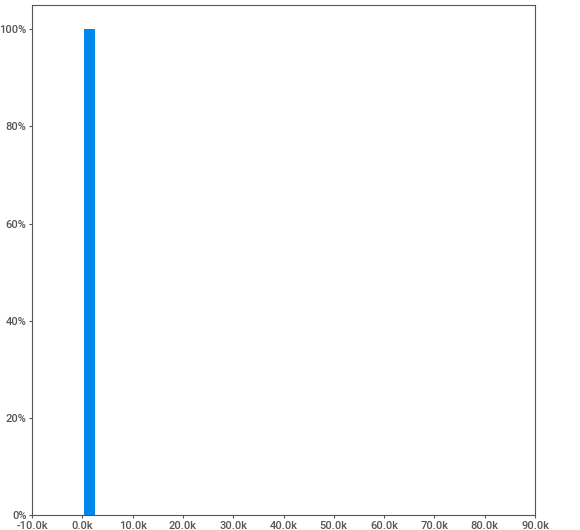
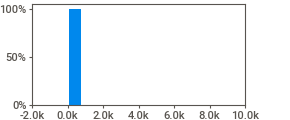
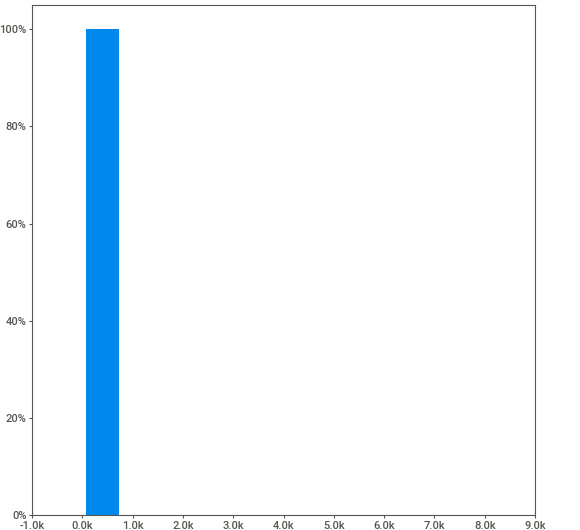
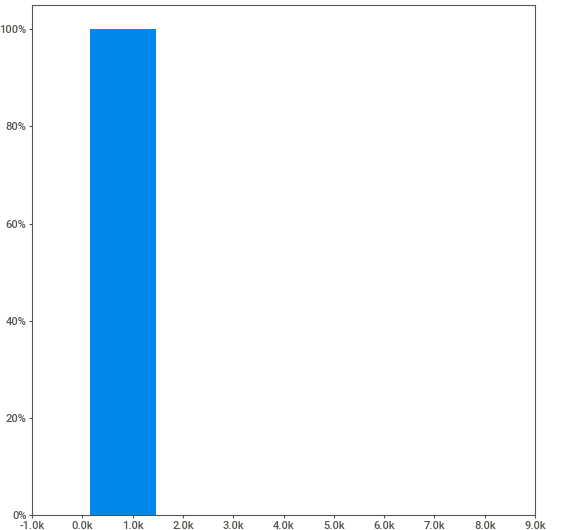
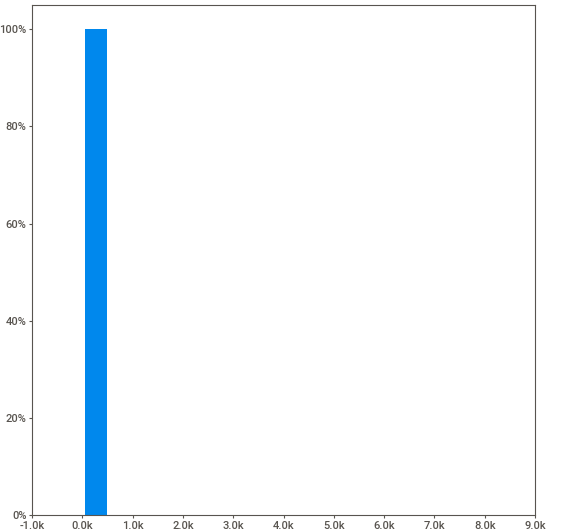
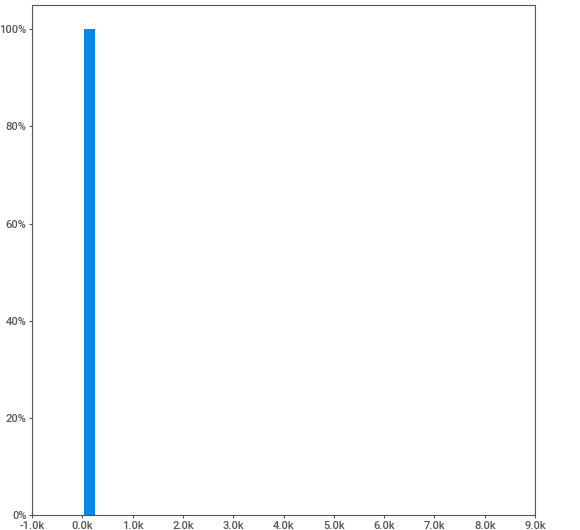
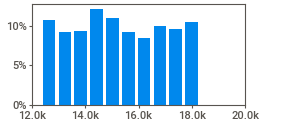
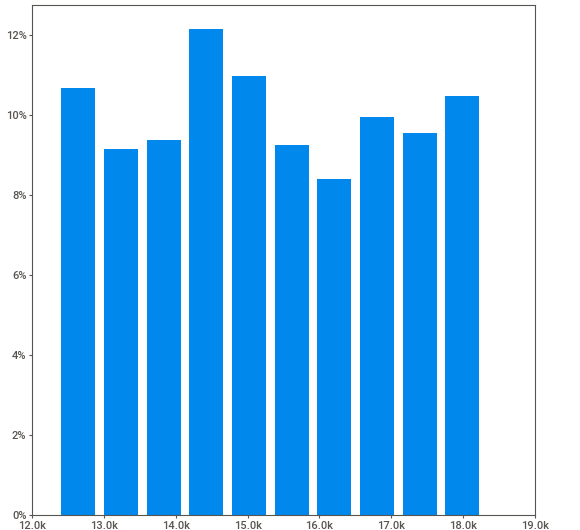
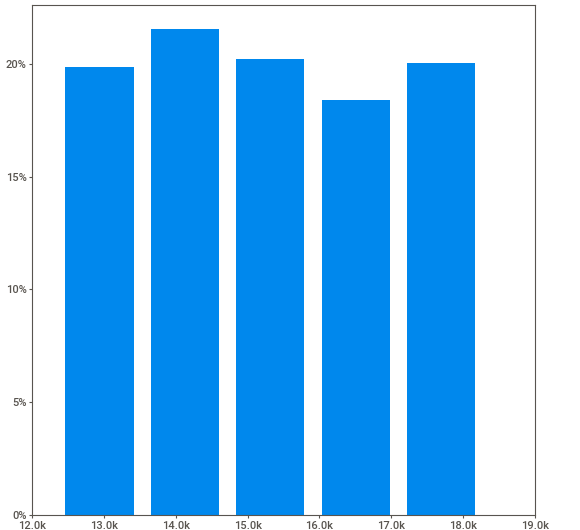
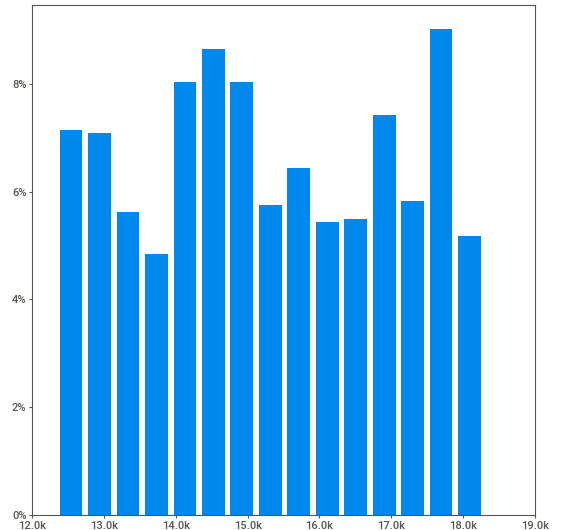
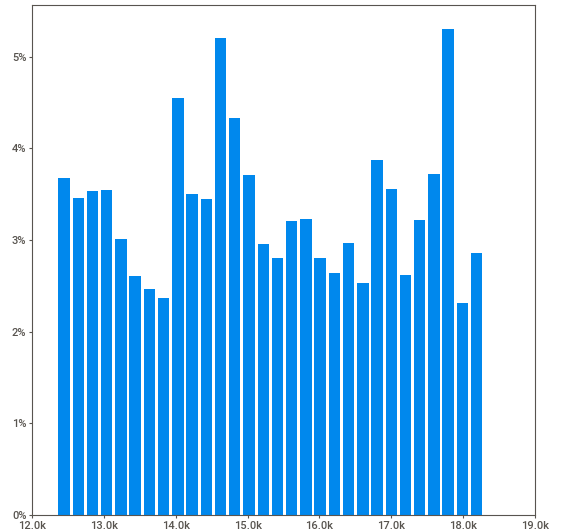
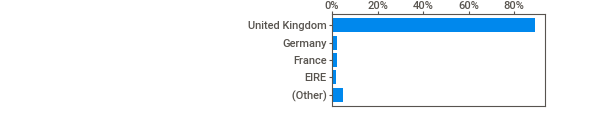
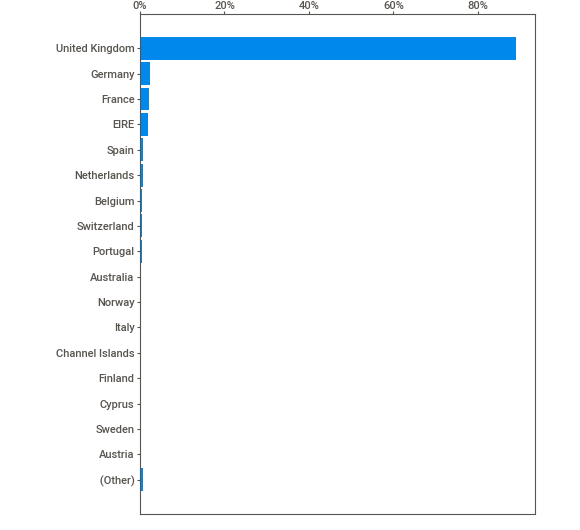
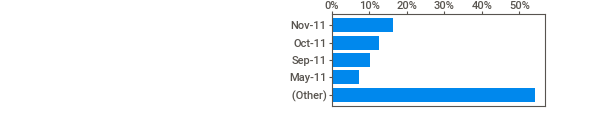
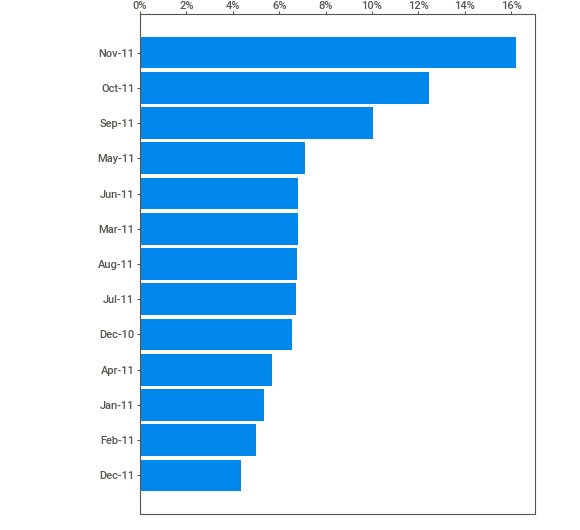
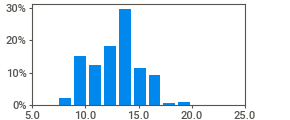
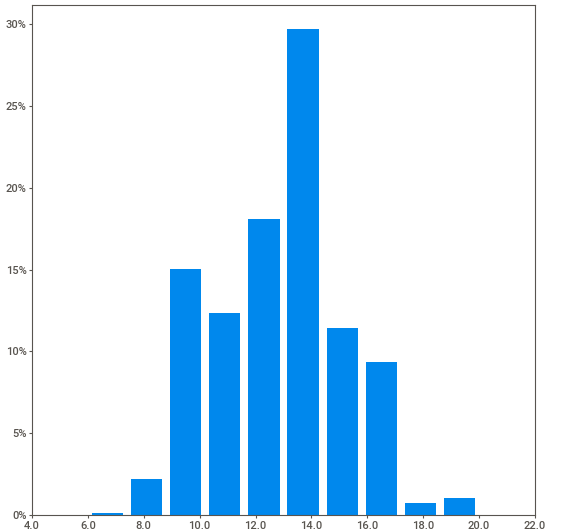
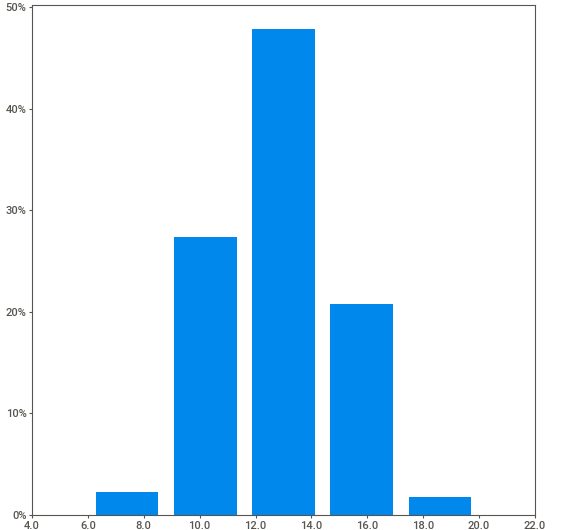
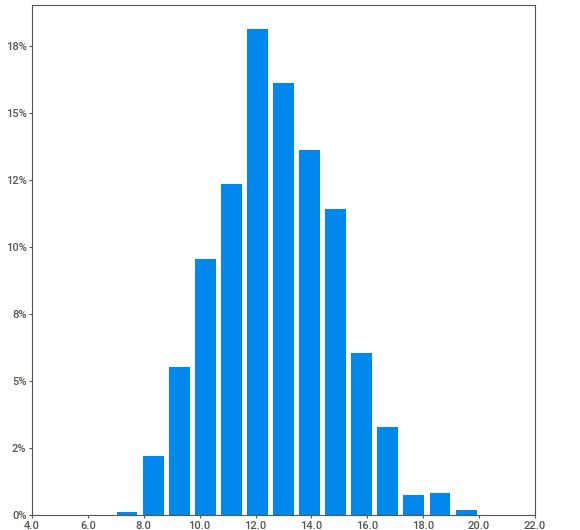
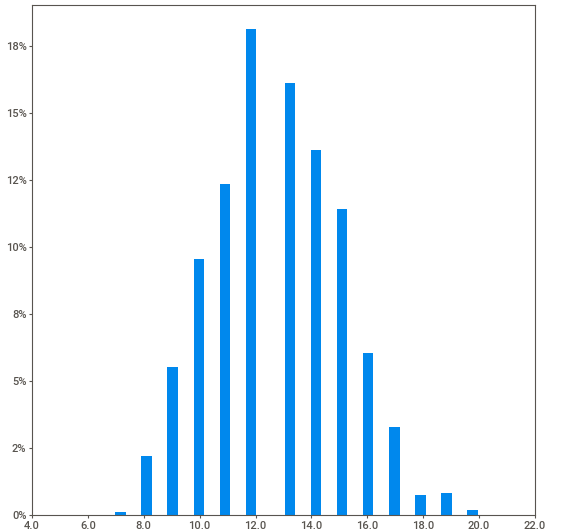
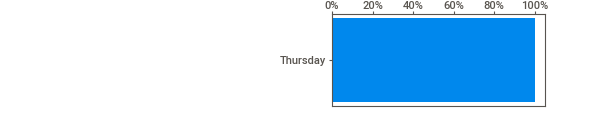
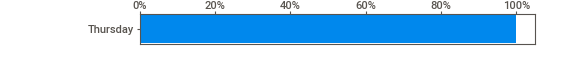
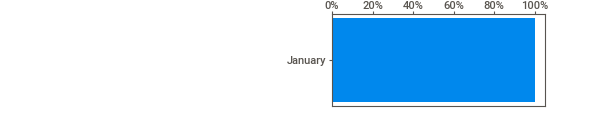
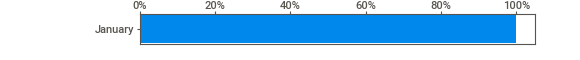
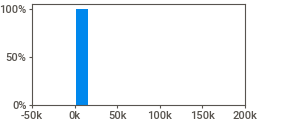
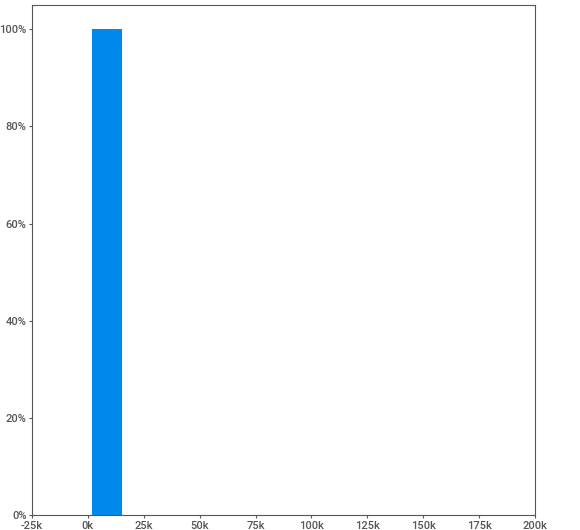
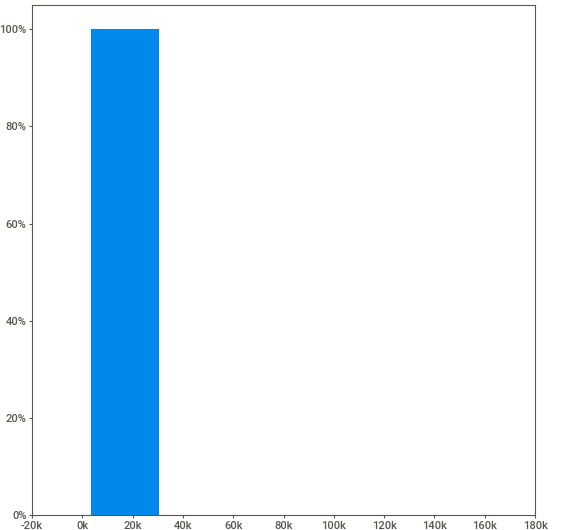
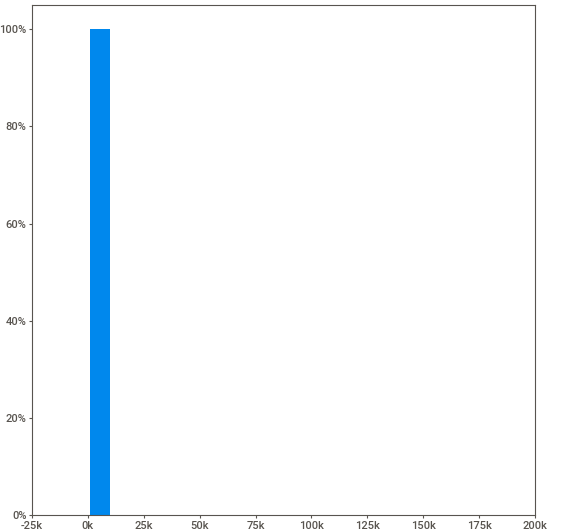
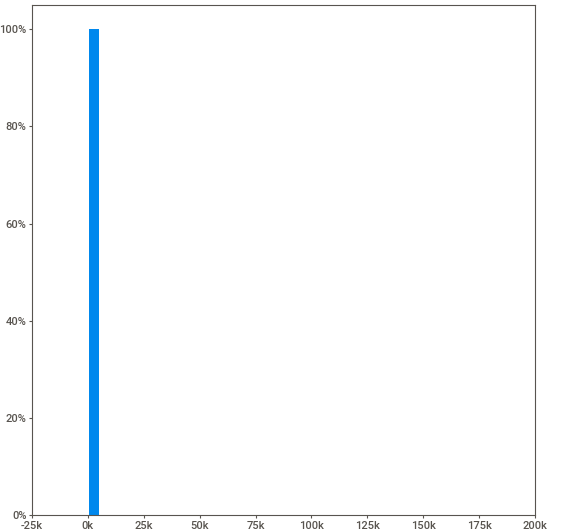
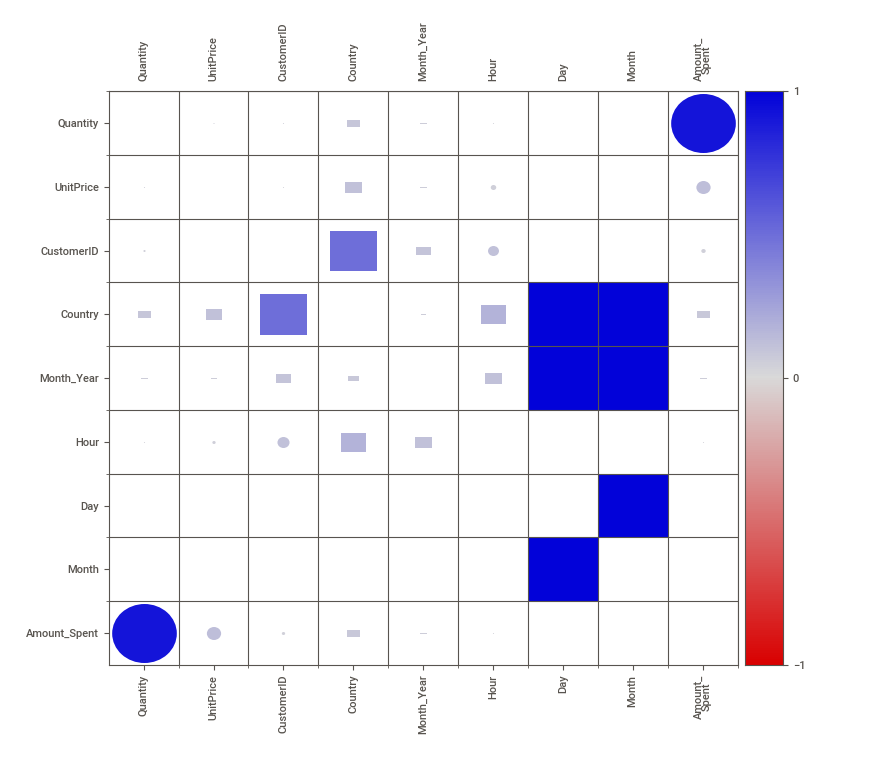
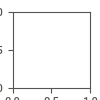

In [34]:
Eda=df.drop(df.columns[[0,1,2,4]], axis = 1)
autoEDA = sweetviz.analyze(Eda)
autoEDA.show_notebook()

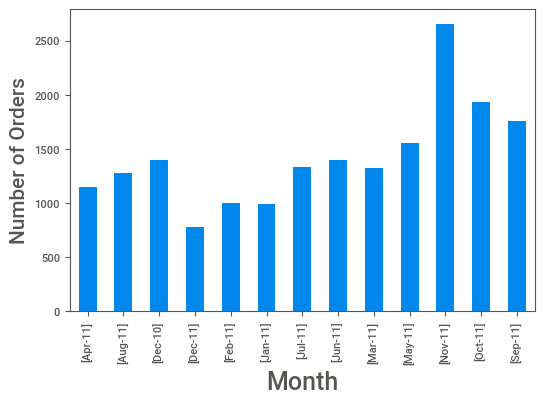

In [53]:
ax = df.groupby('InvoiceNo')['Month_Year'].unique().value_counts().sort_index().plot(kind='bar')
ax.set_xlabel('Month',fontsize=18)
ax.set_ylabel('Number of Orders',fontsize=15)
plt.show()

# Order Per Hour 

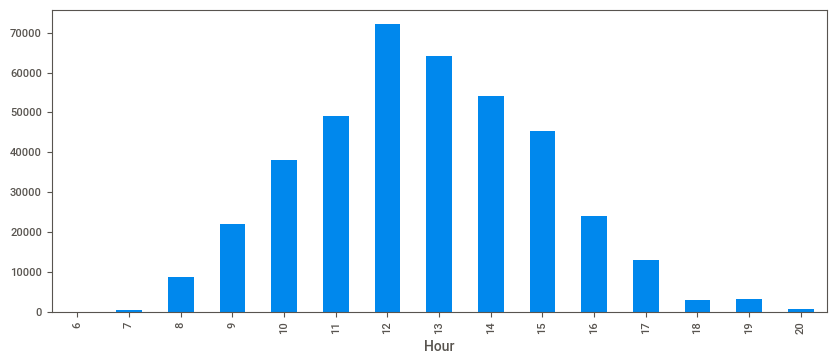

In [54]:
df_hour=df.groupby('Hour').count()
df_h=df_hour["InvoiceNo"]
df_timewise=df_h.plot.bar(figsize=(10,4))

When we check for hour  there are no transactions after 8:00pm until the next day at 6:00am

we notice that the company receives the highest number of orders at 12:00pm. One of the reasons could be due to the fact that most customers make purchases during lunch hour between 12:00 pm - 2:00 pm

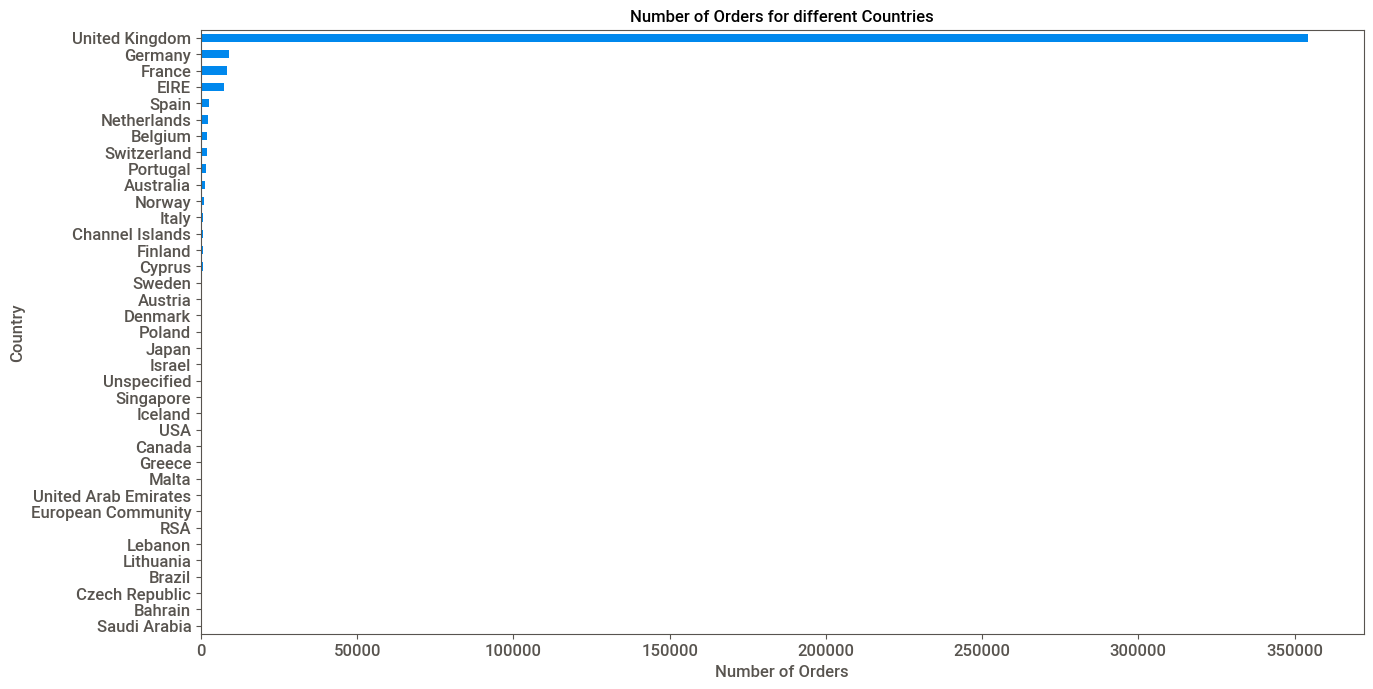

In [55]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

The uk based company seems that the country with most sold items is UK.
For further analysis, UK will be dropped

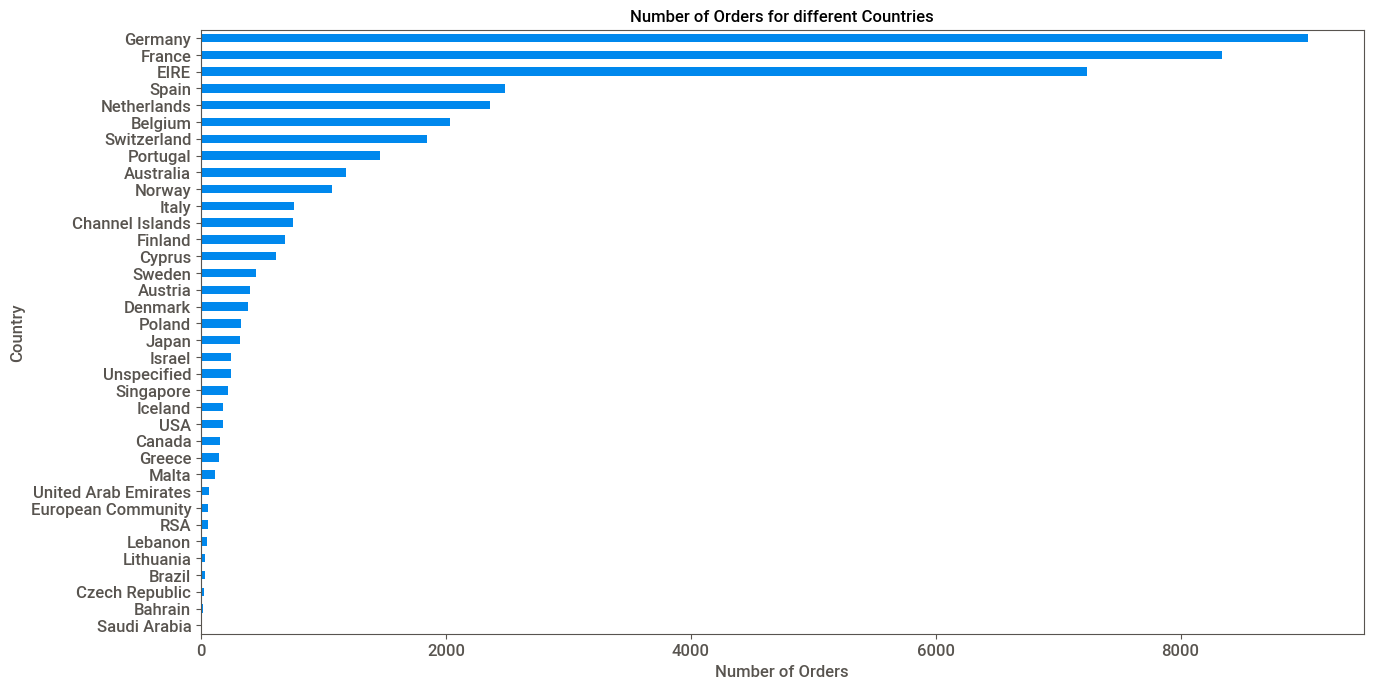

In [56]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

Now after droping uk we can see that the Germany, france and Eire are the country where customers spend most money

For similar reason as above, we will exclude UK for this analysis

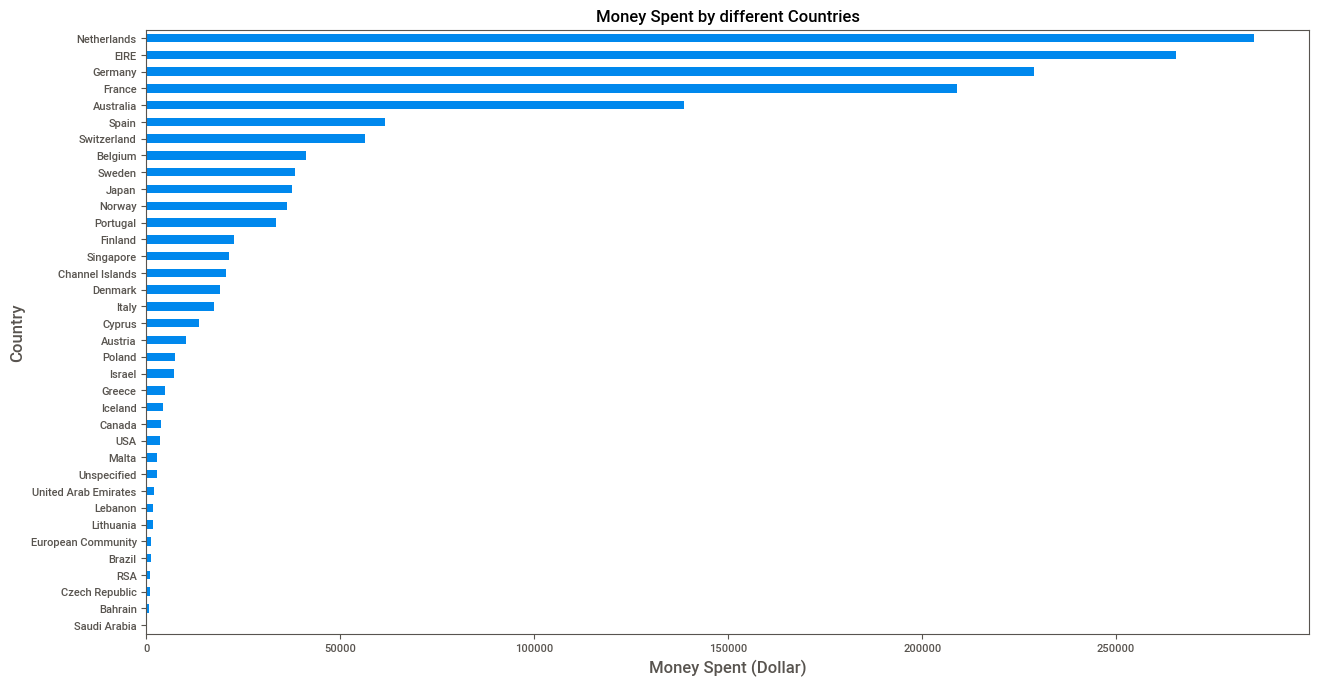

In [57]:
group_country_amount_spent = df.groupby('Country')['Amount_Spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']
# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

After droping UK customers from the Netherlands, EIRE, Germany, France and Australia spent the most money .

# Most sold Products

In [58]:
most_sold_products=df.groupby(by=['StockCode','Description'])['Quantity'].sum().sort_values(ascending=False).iloc[:50]
df_top_prod=most_sold_products.to_frame().reset_index()
df_top_prod.head(10)

,StockCode,Description,Quantity
0,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
1,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
3,85099B,JUMBO BAG RED RETROSPOT,46181
4,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36725
5,84879,ASSORTED COLOUR BIRD ORNAMENT,35362
6,21212,PACK OF 72 RETROSPOT CAKE CASES,33693
7,22197,POPCORN HOLDER,30931
8,23084,RABBIT NIGHT LIGHT,27202
9,22492,MINI PAINT SET VINTAGE,26076


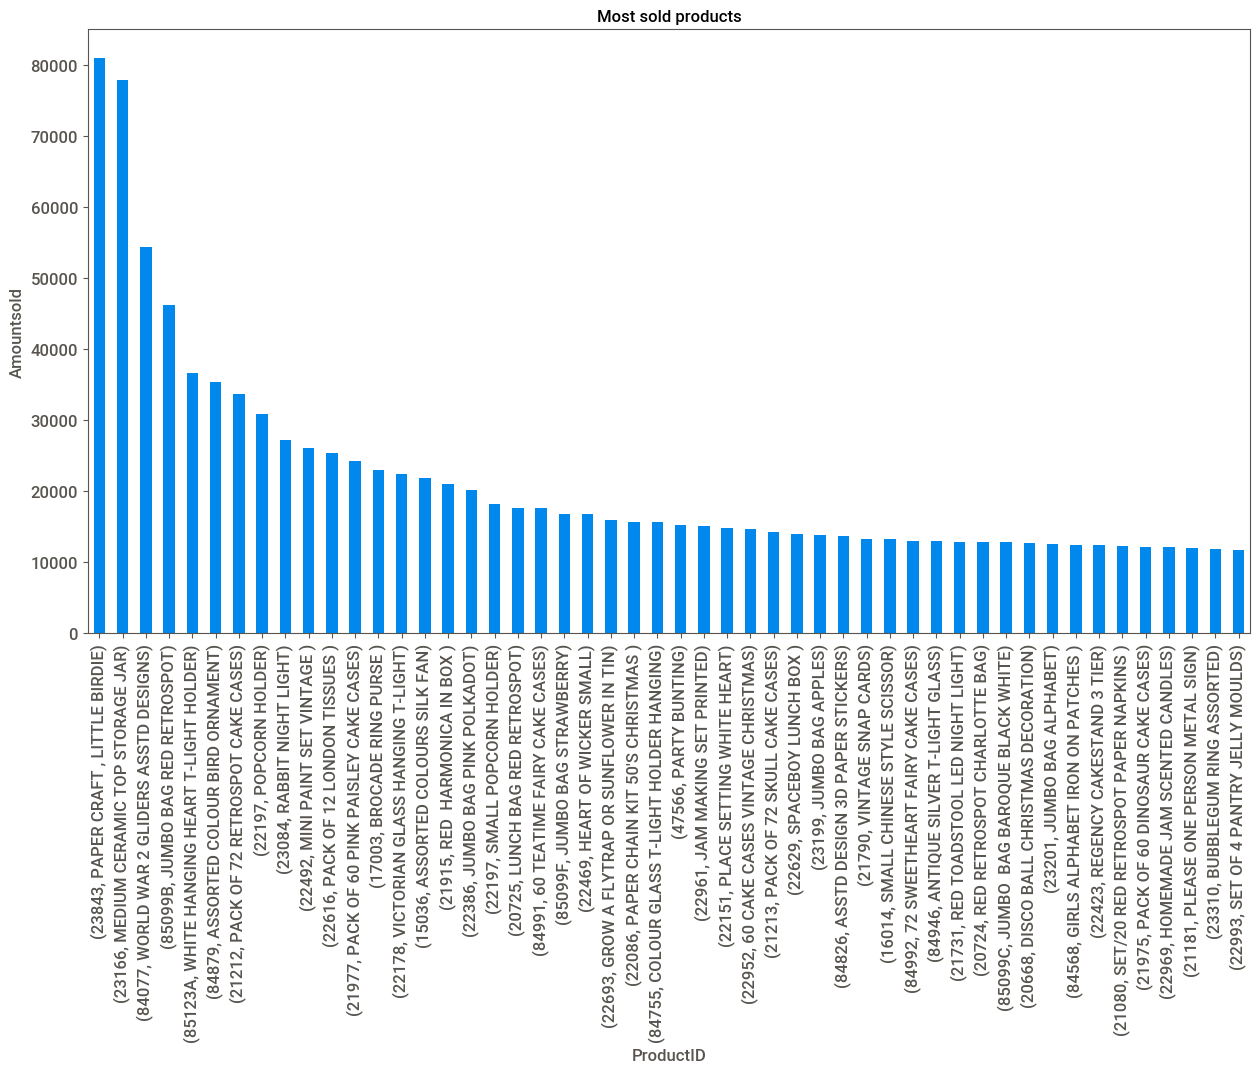

In [59]:
plt.subplots(figsize=(15,8))
most_sold_products.plot(kind='bar', fontsize=12)
plt.xlabel('ProductID', fontsize=12)
plt.ylabel('Amountsold', fontsize=12)
plt.title('Most sold products', fontsize=12)
plt.show()

# Most profitable products

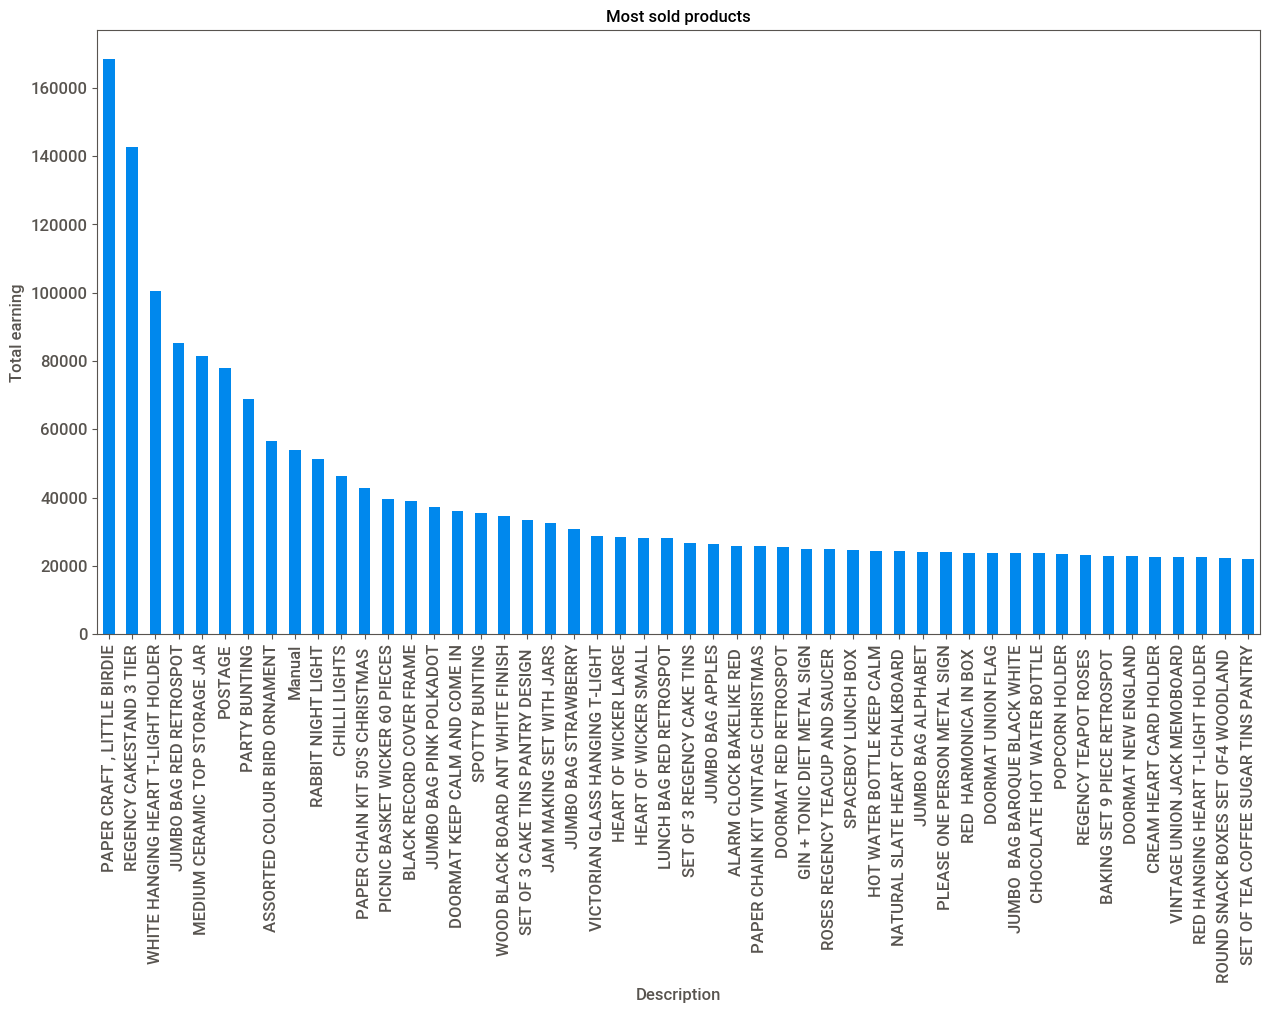

In [60]:
most_profitable_product = df.groupby(by=['Description'])['Amount_Spent'].sum().sort_values(ascending=False).iloc[:50]
df_prof_prod = most_profitable_product.to_frame().reset_index().head()
plt.subplots(figsize=(15,8))
most_profitable_product.plot(kind='bar', fontsize=12)
plt.xlabel('Description', fontsize=12)
plt.ylabel('Total earning', fontsize=12)
plt.title('Most sold products', fontsize=12)
plt.show()

1. The customer with the highest number of orders comes from the United Kingdom (UK)


2. The customer with the highest money spent on purchases comes from Netherlands


3. The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as follow → United Kingdom, Germany, France, Ireland (EIRE), Spain


4. As the company receives the highest number of orders from customers in the UK (since it is a UK-based company), customers in the UK spend the most on their purchases. Therefore, the TOP 5 countries (including UK) that spend the most money on purchases are as follow → United Kingdom, Netherlands, Ireland (EIRE), Germany, France


5.	November 2011 has the highest sales. The month with the lowest sales is undetermined as the dataset consists of transactions until 9th December 2011 in December


6.	There are no transactions on Saturday between 1st Dec 2010 — 9th Dec 2011



7.	The number of orders received by the company tends to increases from Monday to Thursday and decrease afterward



8 . In terms of hours, there are no transactions after 8:00pm until the next day at 6:00am.


9.	The company receives the highest number of orders at 12:00pm. Possibly most customers made purchases during lunch hour between 12:00pm — 2:00pm



